In [1]:
!source myenv/bin/activate  # On Linux/Mac


/bin/bash: line 1: myenv/bin/activate: No such file or directory


In [2]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 16094, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 16094 (delta 0), reused 4 (delta 0), pack-reused 16089
Receiving objects: 100% (16094/16094), 14.76 MiB | 5.73 MiB/s, done.
Resolving deltas: 100% (11024/11024), done.
/kaggle/working/yolov5


In [3]:
!pip install numpy
!pip install seaborn


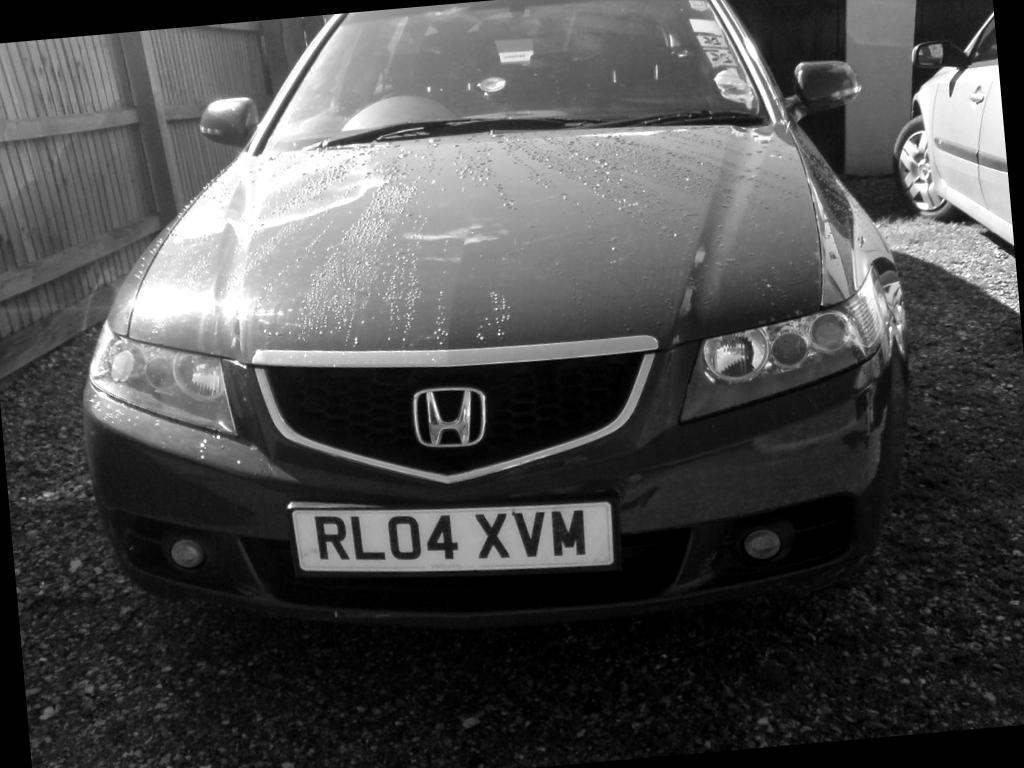

In [4]:
from PIL import Image
original_image=Image.open("/kaggle/input/testingimage/53386dae3cf13cc3_jpg.rf.0d3aa8bd2536d788f08d5b8fdf22b2ac.jpg")
original_image

In [5]:
import cv2
import pytesseract
from yolov5.models.experimental import attempt_load
from yolov5.utils.general import non_max_suppression
import torch
from torchvision import transforms

# Load YOLOv5 model
model = attempt_load('/kaggle/input/modeldata/yolov5/runs/train/exp/weights/best.pt')



  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/f4/79/b192c64e13eefc7f8543a10080767ab057850fa9bdbc38e7c261a3432c93/ultralytics-8.0.227-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 21.4 MB/s eta 0:00:00


Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs


In [6]:
# Load the image for detection
image = cv2.imread('/kaggle/input/testingimage/53386dae3cf13cc3_jpg.rf.0d3aa8bd2536d788f08d5b8fdf22b2ac.jpg')

# Convert the image to the format expected by YOLOv5 (BGR to RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the NumPy array to a PyTorch tensor
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image)

# Add a batch dimension (batch size of 1)
image_tensor = image_tensor.unsqueeze(0)

# Perform object detection using YOLOv5
results, _ = model(image_tensor)

# Perform non-maximum suppression
det = non_max_suppression(results, conf_thres=0.4)[0]

# Extract license plates and perform ALPR
if det is not None:
    x, y, w, h = map(int, det[0][:4])
    roi = image[y:y+h, x:x+w]

    # Perform ALPR on the ROI
    license_plate_text = pytesseract.image_to_string(roi)

    # Process or save the results as needed
    print('License Plate:', license_plate_text)


License Plate: RLO4 XVM

